In [0]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [613]:
df = web.DataReader('AAL', data_source='yahoo', start='2020-02-01', end='2020-03-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,27.670000,26.740000,26.930000,27.160000,7631900.0,27.059999
2020-02-04,28.610001,27.549999,27.680000,28.430000,10832900.0,28.430000
2020-02-05,29.240000,28.549999,28.959999,29.100000,8959700.0,29.100000
2020-02-06,29.450001,28.139999,29.260000,28.299999,8335800.0,28.299999
2020-02-07,28.549999,27.780001,28.059999,28.379999,6231800.0,28.379999
2020-02-10,28.809999,27.980000,28.190001,28.790001,15134300.0,28.790001
2020-02-11,29.940001,28.969999,29.059999,29.840000,8977700.0,29.840000
2020-02-12,30.780001,29.990000,30.000000,30.469999,9315400.0,30.469999
2020-02-13,30.400000,29.730000,30.030001,30.090000,9119400.0,30.090000


In [614]:
df.shape

(40, 6)

In [615]:
df = df[['Adj Close']]
print(df.tail())

            Adj Close
Date                 
2020-03-24      13.92
2020-03-25      15.39
2020-03-26      15.66
2020-03-27      14.04
2020-03-30      12.25


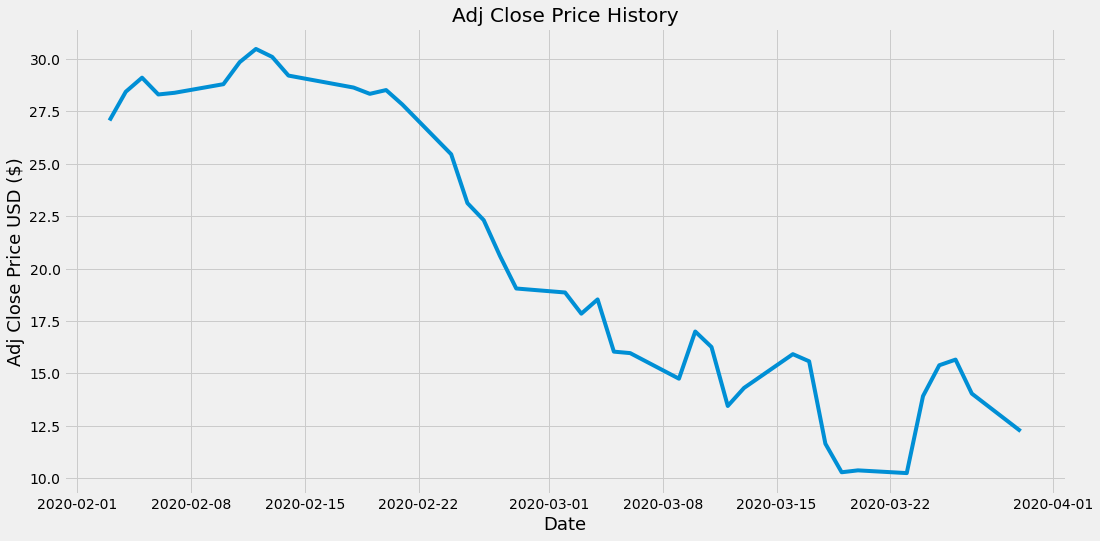

In [616]:
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [617]:
forecast_out = 10
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

print(df.tail())

            Adj Close  Prediction
Date                             
2020-03-24      13.92         NaN
2020-03-25      15.39         NaN
2020-03-26      15.66         NaN
2020-03-27      14.04         NaN
2020-03-30      12.25         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [618]:
X = np.array(df.drop(['Prediction'],1))

X = X[:-forecast_out]
print(X)

[[27.05999947]
 [28.43000031]
 [29.10000038]
 [28.29999924]
 [28.37999916]
 [28.79000092]
 [29.84000015]
 [30.46999931]
 [30.09000015]
 [29.20000076]
 [28.62999916]
 [28.32999992]
 [28.51000023]
 [27.81999969]
 [25.45000076]
 [23.12000084]
 [22.30999947]
 [20.60000038]
 [19.04999924]
 [18.86000061]
 [17.85000038]
 [18.53000069]
 [16.04000092]
 [15.97000027]
 [14.75      ]
 [17.        ]
 [16.26000023]
 [13.44999981]
 [14.31000042]
 [15.92000008]]


In [619]:
y = np.array(df['Prediction'])

y = y[:-forecast_out]
print(y)

[28.62999916 28.32999992 28.51000023 27.81999969 25.45000076 23.12000084
 22.30999947 20.60000038 19.04999924 18.86000061 17.85000038 18.53000069
 16.04000092 15.97000027 14.75       17.         16.26000023 13.44999981
 14.31000042 15.92000008 15.57999992 11.64999962 10.28999996 10.38000011
 10.25       13.92000008 15.39000034 15.65999985 14.03999996 12.25      ]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [621]:
svr_rbf = SVR(kernel='rbf') 
svr_rbf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [622]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.45864194845262435


In [623]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [624]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6076264765826618


In [625]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)


[[15.57999992]
 [11.64999962]
 [10.28999996]
 [10.38000011]
 [10.25      ]
 [13.92000008]
 [15.39000034]
 [15.65999985]
 [14.03999996]
 [12.25      ]]


In [626]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[12.90407771 10.29248734  9.38873117  9.44853868  9.36215013 11.80096339
 12.7778179  12.9572398  11.88070652 10.69120365]


In [627]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[14.63254191 15.75144892 16.15412499 16.13008813 16.16466968 15.0185745
 14.66426287 14.62032447 14.98374746 15.55503963]
